# Prophet
Prophet은 페이스북에서 만든 미래 예측 소프트웨어로, 시계열 데이터에 계절성과 휴일의 영향을 반영해 미래를 예측한다. 

### 의미
해외에서 잘 만들어진 모델이라 할지라도, 다루고자 하는 데이터셋의 특성을 완전히 반영하지 못하기에 예측값의 정확도가 낮다. 따라서 이번 프로젝트를 통해 우리가 영주시 사과의 가격에 미치는 여러 변수를 고려해 예측 결과값을 높이고자 했다.

20:49:09 - cmdstanpy - INFO - Chain [1] start processing
20:49:09 - cmdstanpy - INFO - Chain [1] done processing


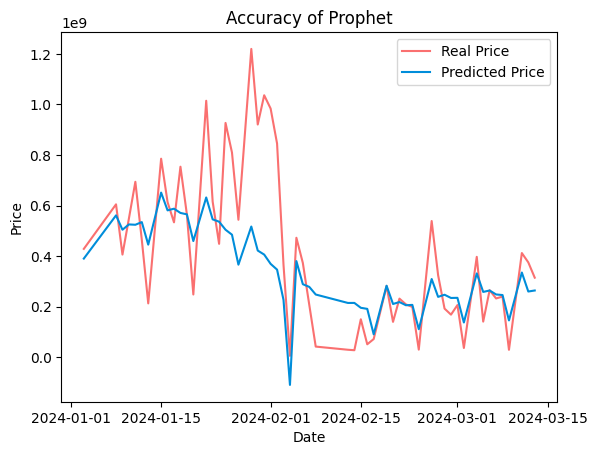

In [2]:
# 라이브러리 불러오기
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# 데이터셋 불러오기
apple = pd.read_excel('/Users/hamhyewon/Downloads/back_data.xlsx')
apple = apple[apple['평균가격(원)'] != 0]

# prophet에 사용할 수 있도록 '일시(X)', '평균가격(Y)' 잘라서 rename
df_pro = apple[['일시', '총거래금액(원)']]
df_pro = df_pro.rename(columns={'일시':'ds', '총거래금액(원)':'y'})

# train, test split
# 1.각 데이터의 기간 정하기
start_date_train = pd.to_datetime('2020-01-02')
end_date_train = pd.to_datetime('2023-12-31')
start_date_test = pd.to_datetime('2024-01-01')
end_date_test = pd.to_datetime('2024-03-13')

# 2.기간에 맞춰 자르기
train_df = df_pro[(df_pro['ds'] >= start_date_train) & (df_pro['ds'] <= end_date_train)]
test_df = df_pro[(df_pro['ds'] >= start_date_test) & (df_pro['ds'] <= end_date_test)]
test_date = pd.DataFrame(test_df['ds'], columns=['ds'])

# 모델 돌리기
model = Prophet(yearly_seasonality=True, daily_seasonality=True)
model.fit(train_df)
forecast = model.predict(test_date)

# 시각화 (yhat = 예측값)
plt.plot(test_df['ds'], test_df['y'], label='Real Price', color='#FA7070')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Price', color='#008DDA')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Accuracy of Prophet')
plt.legend()

plt.show()